# ANALISIS SENTIMEN TEMPAT WISATA DI DIY

19.11.3201 - Aqsal Harris Pratama

Dataset : https://drive.google.com/file/d/1KsHBF0r9xmotvPcUbzL5PADt8Y4hT3kb/view?usp=sharing

# Tahapan :
1. Import dan Install Library
2. Data Information
3. Preprocessing
4. Feature Extraction and Data Splitting
5. Modelling
6. Evaluate
7. Testing

##1. Import and Install Library

In [ ]:
import numpy as np
import pandas as pd

import re 

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import *

import pickle
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.4 MB/s eta 0:00:00


##2. EDA

###Dataset Read

In [ ]:
df = pd.read_csv('/content/labelled.csv')
df.head()

,text,value
0,"banyak resto seafood/boga bahari, tempat bagus...",POSITIF
1,pantai kotor,NEGATIF
2,Enak buat makan seafood,POSITIF
3,"Tempat nya bagus, hanya saja untuk saat ini ma...",POSITIF
4,Aku benci masa 1 orang bayarnya 90.000 behhhh...,NEGATIF


###General Information

In [ ]:
df.shape

(2434, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2434 non-null   object
 1   value   2434 non-null   object
dtypes: object(2)
memory usage: 38.2+ KB


In [ ]:
df.describe()

,text,value
count,2434,2434
unique,2343,2
top,Bagus,POSITIF
freq,12,1588


### Check Missing Values

In [ ]:
df.isnull().sum()

text     0
value    0
dtype: int64

### Visualize Data

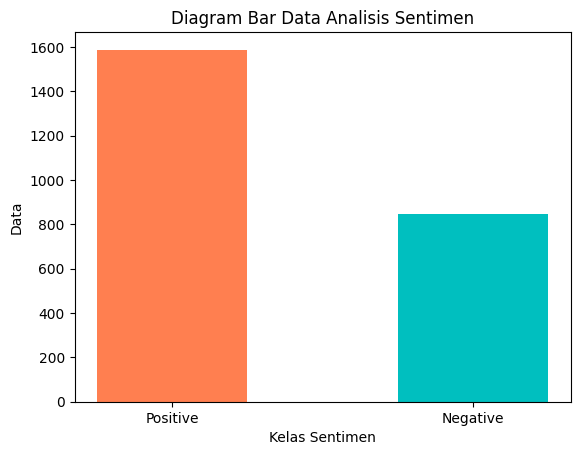

In [ ]:
#diagram batang data awal
labels = ['Positive','Negative']
data_count = [df['value'].value_counts()['POSITIF'], 
              df['value'].value_counts()['NEGATIF']]

plt.bar(labels, data_count, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen')
plt.show()

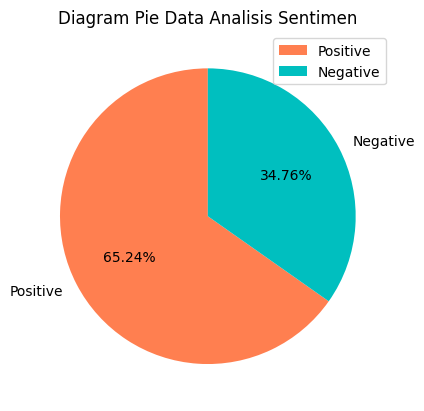

In [ ]:
labels = ['Positive','Negative']
data_count = [df['value'].value_counts()['POSITIF'], 
              df['value'].value_counts()['NEGATIF']]
plt.pie(data_count, 
        labels=labels, 
        colors=['coral', 'c'], 
        startangle=90, 
        autopct='%1.2f%%')
plt.title('Diagram Pie Data Analisis Sentimen')
plt.legend()
plt.show()

##3. Preprocessing

###Create Preprocessing Function

In [ ]:
#casefolding
def casefolding(text):
  lowered_text = text.lower()
  return lowered_text

#filtering
def filtering(text):
  filtered_text = re.sub('[^a-zA-Z]', ' ', text)
  return filtered_text

#tokenizing
def token(text):
  tokens = word_tokenize(text)
  return tokens

#stopword
def stopword_removal(tokens):
  stop_words = set(stopwords.words('indonesian'))    
  filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
  return filtered_tokens

#stemming
def stemming(tokens):
  stemmer = StemmerFactory().create_stemmer()
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  stemmed_tokens_joined = ' '.join(stemmed_tokens)
  return stemmed_tokens_joined

###Start Preprocessing

In [ ]:
df['text'] = df['text'].apply(casefolding)
df.head()

,text,value
0,"banyak resto seafood/boga bahari, tempat bagus...",POSITIF
1,pantai kotor,NEGATIF
2,enak buat makan seafood,POSITIF
3,"tempat nya bagus, hanya saja untuk saat ini ma...",POSITIF
4,aku benci masa 1 orang bayarnya 90.000 behhhh...,NEGATIF


In [ ]:
df['text'] = df['text'].apply(filtering)
df.head()

,text,value
0,banyak resto seafood boga bahari tempat bagus...,POSITIF
1,pantai kotor,NEGATIF
2,enak buat makan seafood,POSITIF
3,tempat nya bagus hanya saja untuk saat ini ma...,POSITIF
4,aku benci masa orang bayarnya behhhh...,NEGATIF


In [ ]:
df['text']=df['text'].apply(token)
df.head()

,text,value
0,"[banyak, resto, seafood, boga, bahari, tempat,...",POSITIF
1,"[pantai, kotor]",NEGATIF
2,"[enak, buat, makan, seafood]",POSITIF
3,"[tempat, nya, bagus, hanya, saja, untuk, saat,...",POSITIF
4,"[aku, benci, masa, orang, bayarnya, behhhhh, b...",NEGATIF


In [ ]:
df['text']=df['text'].apply(stopword_removal)
df.head()

,text,value
0,"[resto, seafood, boga, bahari, bagus, cocok, m...",POSITIF
1,"[pantai, kotor]",NEGATIF
2,"[enak, makan, seafood]",POSITIF
3,"[nya, bagus, wahana, tutup, karna, efek, pandemi]",POSITIF
4,"[benci, orang, bayarnya, behhhhh, bankrut, dah]",NEGATIF


In [ ]:
df['text'] = df['text'].apply(stemming)
df.head()

,text,value
0,resto seafood boga bahari bagus cocok nikmat s...,POSITIF
1,pantai kotor,NEGATIF
2,enak makan seafood,POSITIF
3,nya bagus wahana tutup karna efek pandemi,POSITIF
4,benci orang bayar behhhhh bankrut dah,NEGATIF


###Repreprocessing

In [ ]:
df = pd.read_csv('/content/labelled-preprocessed.csv')

In [ ]:
df.isna().sum()

text     10
value     0
dtype: int64

In [ ]:
df.dropna(axis=0, how='any', inplace=True)
print(df.isna().sum())
print('\nPanjang Dataframe : ',len(df))

text     0
value    0
dtype: int64

Panjang Dataframe :  2424


In [ ]:
df.to_csv('preprocessed.csv', index=False)

##4. Feature Extraction and Data Splitting

### Feature Extraction (Vectroize)


In [ ]:
data_clean = pd.read_csv('/content/preprocessed.csv')

In [ ]:
tfidf = TfidfVectorizer()
tfidf_hasil = tfidf.fit_transform(data_clean['text'])

In [ ]:
data_clean['text'].loc[0]

'resto seafood boga bahari bagus cocok nikmat senja bareng keluarga kasih'

In [ ]:
print(tfidf_hasil)

  (0, 1871)	0.3013132235064129
  (0, 1929)	0.21768459133168744
  (0, 370)	0.31616005134131564
  (0, 3818)	0.3438997019460203
  (0, 2895)	0.22871254251345619
  (0, 789)	0.22156953368581742
  (0, 292)	0.1676645195743284
  (0, 299)	0.42997591503508026
  (0, 560)	0.42997591503508026
  (0, 3717)	0.2106417513333078
  (0, 3534)	0.31616005134131564
  (1, 2128)	0.8562468026241093
  (1, 3119)	0.5165669491905086
  (2, 2427)	0.460944414054721
  (2, 1137)	0.6348175982571695
  (2, 3717)	0.6201103644471272
  (3, 3107)	0.3540802736941971
  (3, 1103)	0.5572657185573875
  (3, 1861)	0.428648253299874
  (3, 4499)	0.3746691962649449
  (3, 4603)	0.3330980732905491
  (3, 2936)	0.26340827364239466
  (3, 292)	0.24418743202991813
  (4, 839)	0.36927605734153934
  (4, 352)	0.4968110546354428
  :	:
  (2420, 2423)	0.1813213055919179
  (2420, 2256)	0.1777428465340279
  (2420, 2743)	0.280049517543916
  (2420, 1861)	0.24748183787958916
  (2421, 131)	0.5989719226093592
  (2421, 3434)	0.47291749964974855
  (2421, 1343)	

###Data Split

In [ ]:
#data split
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_hasil, 
    data_clean['value'], 
    test_size=0.2, 
    random_state=42)

##5. Modelling

###Support Vector Machine

In [ ]:
modelSVM=SVC(kernel='linear', probability=True)
modelSVM.fit(X_train,y_train)
predictedSVM = modelSVM.predict(X_test)

##6. Evaluasi

### Accuracy, Precision, Recall, F1-Score, Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, predictedSVM))

[[118  55]
 [ 21 291]]


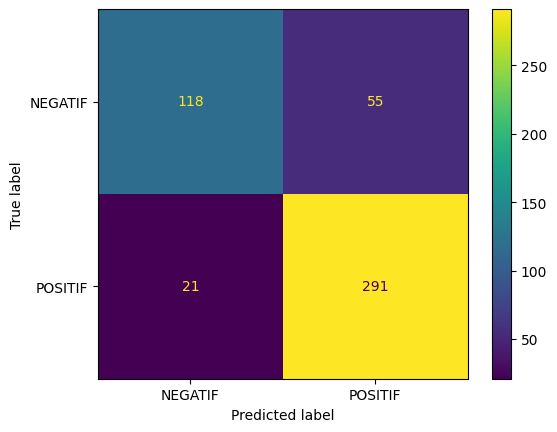

In [ ]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, predictedSVM),
    display_labels=modelSVM.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,predictedSVM,zero_division=0))

              precision    recall  f1-score   support

     NEGATIF       0.85      0.68      0.76       173
     POSITIF       0.84      0.93      0.88       312

    accuracy                           0.84       485
   macro avg       0.84      0.81      0.82       485
weighted avg       0.84      0.84      0.84       485



### Wordcloud

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

text = ' '.join(df_pos['text'])
tokens = word_tokenize(text)
freq_dist = FreqDist(tokens)
sorted_freq = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)
word_array = [word for word, freq in sorted_freq]
print(word_array)


['pantai', 'candi', 'makan', 'ikan', 'bagus', 'wisata', 'masuk', 'nya', 'anak', 'banget', 'foto', 'tiket', 'prambanan', 'bersih', 'harga', 'parkir', 'luas', 'jogja', 'laut', 'seafood', 'jalan', 'kesini', 'beli', 'main', 'murah', 'indah', 'tempat', 'depok', 'enak', 'keluarga', 'ya', 'kunjung', 'cocok', 'pasar', 'warung', 'nikmat', 'wahana', 'sedia', 'yg', 'kalo', 'air', 'mall', 'k', 'unjung', 'salah', 'ombak', 'langsung', 'nyaman', 'pas', 'ga', 'lengkap', 'rb', 'masak', 'orang', 'pandemi', 'spot', 'bawa', 'nelayan', 'kereta', 'kuliner', 'jual', 'pandang', 'lumayan', 'suka', 'pilih', 'libur', 'pagi', 'tebing', 'segar', 'gak', 'keliling', 'area', 'lokasi', 'seru', 'aja', 'jam', 'sejarah', 'binatang', 'keren', 'sayang', 'yogyakarta', 'ribu', 'kapal', 'hasil', 'hewan', 'parangtritis', 'sore', 'buka', 'lupa', 'bayar', 'breksi', 'pasir', 'fasilitas', 'tp', 'puas', 'sana', 'jangkau', 'kali', 'pintu', 'bangun', 'tarik', 'pinggir', 'utk', 'masakan', 'tutup', 'ramah', 'klo', 'sih', 'tinggal', 'se

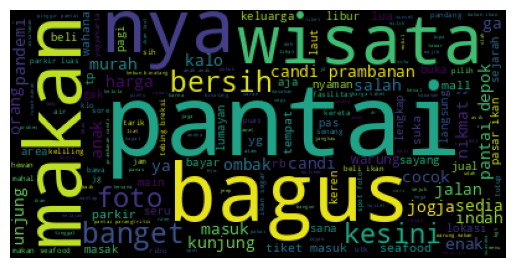

In [ ]:
#wordcloud positif
df_pos = data_clean[data_clean['value'].str.contains("POSITIF")]
wordcloud_positif = WordCloud().generate(' '.join(df_pos['text']))
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.show()

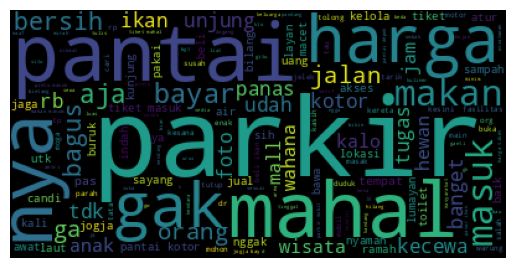

In [ ]:
#wordcloud negatif
df_neg = data_clean[data_clean['value'].str.contains("NEGATIF")]
wordcloud_negatif = WordCloud().generate(' '.join(df_neg['text']))
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.show()

### Cross Validation

In [ ]:
#Cross Validation
scores = cross_val_score(modelSVM, tfidf_hasil, data_clean['value'], cv=10)
print('Hasil Cross Validation : ', scores)
print('Rata-rata Cross Validation : ', np.mean(scores))

Hasil Cross Validation :  [0.89711934 0.86831276 0.81893004 0.8600823  0.82644628 0.83471074
 0.81818182 0.82231405 0.83471074 0.83471074]
Rata-rata Cross Validation :  0.8415518824609733


### Export and Load Model

In [ ]:
# save the model to disk
filename = 'modelSVM.sav'
pickle.dump(modelSVM, open(filename, 'wb'))
 
# load the model from disk
modelSVM_loaded = pickle.load(open(filename, 'rb'))
result = modelSVM_loaded.score(x_test, y_test)

predictSVM = modelSVM_loaded.predict(x_test)
print('SVM Accuracy : ', accuracy_score(y_test,predictSVM))

SVM Accuracy :  0.8765432098765432


##7. Testing

In [ ]:
#testing
uji = 'tempat wisata yang bagus namun tiket mahal'

#preprocessing
def preproses(uji):
  return np.array([stemming(stopword_removal(token(filtering(casefolding(uji)))))])

def vectorize(uji):
  uji_tfidf = TfidfVectorizer().fit(data_clean['text'])
  uji_vectorized = uji_tfidf.transform(uji)
  return uji_vectorized

uji = preproses(uji)
uji = vectorize(uji)

In [ ]:
def pengujian(kalimat):
    # Preprocessing
    kalimat = np.array([
        stemming(
            stopword_removal(
                token(
                    filtering(
                        casefolding(kalimat)))))])

    # Vectorize
    tes_tfidf = TfidfVectorizer().fit(data_clean['text'])
    kalimat = tes_tfidf.transform(kalimat)

    # Predict Label
    predictions_ujiSVM = modelSVM.predict(kalimat)
    print(predictions_ujiSVM)

    # Probability
    y_proba = modelSVM.predict_proba(kalimat)
    print(y_proba)

In [ ]:
pengujian('tempat wisata bagus namun harga tiket mahal')

['NEGATIF']
[[0.59006206 0.40993794]]


In [ ]:
pengujian('tempat wisata pantai bagus namun harga tiket mahal')

['POSITIF']
[[0.51051433 0.48948567]]


In [ ]:
pengujian('meskipun cuacanya panas, pelayanan yang ditawarkan sangat bagus dan memuaskan')

['NEGATIF']
[[0.94302135 0.05697865]]


In [ ]:
pengujian('Tentu saja saya sangat menyukai berkeliling mencari tempat parkir saat terik begini!')

['POSITIF']
[[0.20688129 0.79311871]]


# Referensi Kode Program

https://www.youtube.com/watch?v=8ApgsLvbTz4

https://github.com/kungfumas/analisa-sentimen-support-vector-machine/blob/master/Sentiment%20Analysis%20with%20Python.ipynb